In [2652]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

In [2653]:
data = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv", header=None)

In [2654]:
data=data

In [2655]:
data = data.drop([0], axis=1)

In [2656]:
df_training = data.copy()

In [2657]:
# df_training=df_training[~df_training.isin([99]).any(axis=1)]

In [2658]:
len(df_training)

24983

In [2659]:
df_training

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
24981,99.00,99.00,99.00,99.00,-9.71,99.00,4.56,-8.30,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [2660]:
df_test = data.copy()

In [2661]:
# df_test=df_test[df_test.isin([99]).any(axis=1)]

In [2662]:
df_test = df_test.replace(99,np.nan)

In [2663]:
df_test

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24981,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2664]:
jokes_rating=dict()

In [2665]:
len(df_test.columns)

100

In [2666]:
for i in range(0,len(df_training.iloc[0])):
    jokes_rating[i]=df_training.iloc[:,i].sum()/len(df_training.iloc[:,0])

In [2667]:
jokes_rating=list({key: value for key, value in sorted(jokes_rating.items(), key=lambda item: item[1], reverse=True)}.items())

In [2668]:
jokes_rating = [ [str(key),value] for key, value in jokes_rating]

In [2669]:
jokes_rating

[['71', 65.5117471880879],
 ['72', 65.23074690789737],
 ['70', 64.95550174118402],
 ['75', 64.78423808189568],
 ['74', 64.06074530680863],
 ['77', 63.88511627906977],
 ['76', 63.81377216507225],
 ['73', 63.738036664932146],
 ['79', 63.64594324140415],
 ['81', 63.17405435696273],
 ['80', 63.13007284953768],
 ['78', 63.07580314613938],
 ['82', 62.95635912420446],
 ['88', 62.46926389945162],
 ['83', 62.4172437257335],
 ['86', 62.26370331825642],
 ['84', 62.222051394948565],
 ['87', 61.75338670295802],
 ['85', 61.60788456150182],
 ['90', 61.46201937317375],
 ['89', 60.6892162670616],
 ['92', 60.42170115678662],
 ['91', 60.2798899251491],
 ['99', 60.13808950086059],
 ['93', 59.05962134251291],
 ['94', 58.749896729776246],
 ['95', 58.54110355041428],
 ['96', 58.01724572709442],
 ['97', 57.06164992194692],
 ['98', 55.753357483088514],
 ['3', 36.24493575631429],
 ['8', 36.22842132650203],
 ['23', 35.00386102549734],
 ['57', 34.98145418884842],
 ['56', 34.43113837409438],
 ['0', 34.401434575511

In [2670]:
cm = sns.light_palette("grey", as_cmap=True)
df = pd.DataFrame(jokes_rating)
df.index = range(0,len(jokes_rating))
df.columns = ["Joke #", "Rating (-10.00 to +10.0)"]
s = df.style.background_gradient(cmap=cm)
display(s)

,Joke #,Rating (-10.00 to +10.0)
0,71,65.511747
1,72,65.230747
2,70,64.955502
3,75,64.784238
4,74,64.060745
5,77,63.885116
6,76,63.813772
7,73,63.738037
8,79,63.645943
9,81,63.174054


In [2671]:
the_best_joke = df.loc[[0]]
print("Rating of the best joke")
the_best_joke

Rating of the best joke


,Joke #,Rating (-10.00 to +10.0)
0,71,65.511747


In [2672]:
the_worst_joke = df.iloc[[-1]]
print("Rating of the worst joke")
the_worst_joke

Rating of the worst joke


,Joke #,Rating (-10.00 to +10.0)
99,15,-3.072122


In [2673]:
arr = df_test.values
print(arr.shape)

(24983, 100)


In [2674]:
rated = np.where(arr!=np.nan)
print(len(rated[0]), rated[1].shape)

2498300 (2498300,)


In [2675]:
def replace(orig, percentage=0.1):
    """
    Replaces 'percentage'% of the original values in 'orig' with 99's
    :param orig: original data array
    :param percentage: percentage of values to replace (0<percentage<1)
    """
    new_data = orig.copy()
    rated = np.where(arr!=np.nan)
    n_rated = len(rated[0])
    idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
    new_data[rated[0][idx], rated[1][idx]] = 99
    return new_data, (rated[0][idx], rated[1][idx])

In [2676]:
new_arr, idx = replace(arr, 0.1)

In [2677]:
new_arr

array([[-7.82,  8.79, -9.66, ...,   nan,   nan,   nan],
       [ 4.08, 99.  , 99.  , ...,  0.34, -4.32,  1.07],
       [99.  ,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [  nan, 99.  ,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [ 2.43,  2.67, -3.98, ...,   nan,   nan,   nan]])

In [2678]:
df_val=pd.DataFrame(new_arr)

In [2679]:
# df_val=df_val[df_val.isin([99]).any(axis=1)]

In [2680]:
df_val

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,99.00,-7.52,-8.50,99.00,99.00,-8.98,-4.76,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,99.00,99.00,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,99.00,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,NaN,NaN,NaN,99.00,9.27,9.03,9.27,NaN,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,99.00,NaN,NaN,NaN
3,99.00,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,99.00,5.73,99.00,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,...,8.83,-1.21,99.00,99.00,8.45,9.03,99.00,8.69,8.79,7.43
24979,9.13,-8.16,99.00,9.08,0.87,-8.93,-3.50,99.00,-8.11,4.90,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,99.00,-8.59,9.13,8.45
24980,NaN,99.00,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,NaN,...,NaN,99.00,NaN,NaN,NaN,99.00,NaN,NaN,NaN,NaN
24981,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2681]:
df_training

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
24981,99.00,99.00,99.00,99.00,-9.71,99.00,4.56,-8.30,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [2682]:
arr[idx[0][0], idx[1][0]]

-0.49

In [2683]:
new_arr[idx[0][0], idx[1][0]]

99.0

In [2684]:
df_test

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24981,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2685]:
df_val

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,99.00,-7.52,-8.50,99.00,99.00,-8.98,-4.76,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,99.00,99.00,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,99.00,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,NaN,NaN,NaN,99.00,9.27,9.03,9.27,NaN,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,99.00,NaN,NaN,NaN
3,99.00,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,99.00,5.73,99.00,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,...,8.83,-1.21,99.00,99.00,8.45,9.03,99.00,8.69,8.79,7.43
24979,9.13,-8.16,99.00,9.08,0.87,-8.93,-3.50,99.00,-8.11,4.90,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,99.00,-8.59,9.13,8.45
24980,NaN,99.00,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,NaN,...,NaN,99.00,NaN,NaN,NaN,99.00,NaN,NaN,NaN,NaN
24981,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2686]:
user_ratings.shape[0]

2000

In [2687]:
n_latent_factors = 500
user_ratings = df_val.values
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [2688]:
latent_item_features

array([[0.663, 0.536, 0.778, ..., 0.49 , 0.174, 0.041],
       [0.921, 0.474, 0.62 , ..., 0.346, 0.77 , 0.206],
       [0.939, 0.125, 0.827, ..., 0.744, 0.377, 0.201],
       ...,
       [0.182, 0.635, 0.465, ..., 0.371, 0.973, 0.751],
       [0.553, 0.309, 0.951, ..., 0.855, 0.232, 0.519],
       [0.642, 0.731, 0.513, ..., 0.048, 0.686, 0.226]])

In [2689]:
latent_user_preferences[0]

array([0.804, 0.365, 0.093, 0.473, 0.214, 0.467, 0.596, 0.933, 0.143,
       0.694, 0.98 , 0.48 , 0.425, 0.239, 0.324, 0.968, 0.431, 0.638,
       0.126, 0.305, 0.584, 0.745, 0.159, 0.446, 0.153, 0.618, 0.065,
       0.511, 0.016, 0.326, 0.729, 0.73 , 0.618, 0.926, 0.785, 0.359,
       0.322, 0.543, 0.537, 0.445, 0.215, 0.703, 0.298, 0.877, 0.835,
       0.244, 0.964, 0.724, 0.059, 0.784, 0.749, 0.146, 0.771, 0.653,
       0.35 , 0.851, 0.467, 0.37 , 0.931, 0.213, 0.916, 0.022, 0.103,
       0.123, 0.88 , 0.321, 0.123, 0.271, 0.899, 0.613, 0.306, 0.861,
       0.609, 0.082, 0.635, 0.079, 0.498, 0.952, 0.047, 0.554, 0.434,
       0.378, 0.583, 0.279, 0.103, 0.18 , 0.334, 0.381, 0.198, 0.5  ,
       0.259, 0.484, 0.145, 0.884, 0.595, 0.872, 0.953, 0.258, 0.54 ,
       0.183, 0.069, 0.315, 0.144, 0.943, 0.305, 0.63 , 0.947, 0.242,
       0.322, 0.92 , 0.02 , 0.099, 0.297, 0.634, 0.317, 0.25 , 0.804,
       0.586, 0.365, 0.474, 0.859, 0.472, 0.182, 0.794, 0.327, 0.203,
       0.364, 0.35 ,

In [2700]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.00001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not math.isnan(rating) and rating!=99:
                    err = train(user_id, item_id, rating)
#                     if err==np.nan:
#                         print(user_id,item_id,rating)
#                         return
                    error.append(err)
        mse = (np.array(error) ** 2).mean()  
#         return mse
#         print(np.nan in error)
        if (iteration % 1) == 0:
            print('Iteration %d/%d:\tMSE=%.3f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

In [2691]:
import math

Iteration 0/20:	MSE=11.362
Iteration 1/20:	MSE=11.347
Iteration 2/20:	MSE=11.334
Iteration 3/20:	MSE=11.321
Iteration 4/20:	MSE=11.308
Iteration 5/20:	MSE=11.295
Iteration 6/20:	MSE=11.282
Iteration 7/20:	MSE=11.270
Iteration 8/20:	MSE=11.257
Iteration 9/20:	MSE=11.244
Iteration 10/20:	MSE=11.232
Iteration 11/20:	MSE=11.219
Iteration 12/20:	MSE=11.206
Iteration 13/20:	MSE=11.194
Iteration 14/20:	MSE=11.181
Iteration 15/20:	MSE=11.169
Iteration 16/20:	MSE=11.156
Iteration 17/20:	MSE=11.144
Iteration 18/20:	MSE=11.131
Iteration 19/20:	MSE=11.119


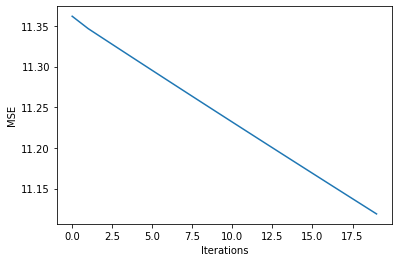

In [2701]:
num_iter = 20
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 1), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [2702]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[-4.008,  3.073, -6.882, ..., -1.497, -5.91 , -6.713],
       [ 3.693,  9.803,  5.619, ...,  1.172,  1.605,  3.871],
       [ 9.599,  9.637,  5.229, ...,  4.458,  6.724,  8.423],
       ...,
       [-1.019, -0.723, -3.94 , ..., -1.527,  1.834, -0.856],
       [ 3.717,  0.634,  2.142, ...,  2.392, -2.727,  0.801],
       [ 1.309,  1.716,  3.531, ...,  4.117,  1.93 ,  2.117]])

In [2703]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = df_val.columns

In [2704]:
comparison_data

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,"(-7.82, -4.007693642904014)","(8.79, 3.072867269498194)","(-9.66, -6.881598125706173)","(99.0, -7.7901633680709725)","(-7.52, -9.316845945969849)","(-8.5, -5.369516533912246)","(99.0, -9.022324543664823)","(99.0, -7.396670990620928)","(-8.98, -9.248874624615137)","(-4.76, -5.57174884533679)",...,"(2.82, -0.9152853734468243)","(nan, -1.2625074529641065)","(nan, 1.61775077147989)","(nan, -3.384132658110455)","(nan, -2.447956831187902)","(nan, -2.0423499207183644)","(-5.63, -1.2247181928852682)","(nan, -1.4965751808495271)","(nan, -5.910425160191835)","(nan, -6.712903662608182)"
1,"(4.08, 3.693294731257745)","(99.0, 9.802662262777787)","(99.0, 5.618550859442127)","(4.37, 4.596061322647811)","(-2.38, 2.3997807877628956)","(-9.66, -0.3774995585889489)","(-0.73, 4.017067370767482)","(-5.34, -2.5260073539171266)","(8.88, 8.795828031881124)","(9.22, 5.953004904002039)",...,"(2.82, 3.6923617899733907)","(99.0, -0.9828464721997485)","(-0.29, 2.0830699806791273)","(7.86, 7.593184727844511)","(-0.19, 1.6183988002581424)","(-2.14, 0.0901444971480112)","(3.06, -0.13226182481196602)","(0.34, 1.171845299826133)","(-4.32, 1.6051642384595393)","(1.07, 3.871262455360435)"
2,"(99.0, 9.598823498153209)","(nan, 9.637072577083618)","(nan, 5.228789512953966)","(nan, 3.2200338316529464)","(99.0, 4.480297360960845)","(9.27, 9.426664042374385)","(9.03, 6.075716895694502)","(9.27, 8.379149832350588)","(nan, 7.13244963212012)","(nan, 4.209041290751345)",...,"(nan, 4.313707772251929)","(nan, 5.230174601312967)","(nan, 9.361428019230079)","(9.08, 7.619278252969072)","(nan, 7.302194238088148)","(nan, 8.905063255471973)","(99.0, 10.975259469954262)","(nan, 4.458335573313517)","(nan, 6.723581200885813)","(nan, 8.423490114446311)"
3,"(99.0, 0.9173820339860587)","(8.35, 4.939052959371723)","(nan, 1.7742787041849504)","(nan, 3.1173408664372984)","(1.8, 1.7083994854144726)","(8.16, 3.216269264423299)","(-2.82, -3.936566683742061)","(6.21, -0.2984024943174942)","(nan, 0.28227561098129716)","(1.84, 0.22034353962338998)",...,"(nan, -1.1930474659094408)","(nan, -1.861202909120006)","(nan, 1.5243025583695498)","(0.53, -1.913508780910569)","(nan, -0.1926258533384384)","(nan, -2.292087948154348)","(nan, 2.779481259404185)","(nan, 5.218915871702209)","(nan, 0.6878497580244911)","(nan, 2.8122376955916564)"
4,"(8.5, 3.1218010316546567)","(4.61, 3.659522608140932)","(-4.17, 0.5378978978387328)","(-5.39, -0.16345017334553483)","(1.36, 2.3475813399905245)","(1.6, 1.8236731657878216)","(7.04, 2.7958942760016843)","(4.61, -0.30365494480944233)","(-0.44, -0.7995028857381612)","(5.73, 1.3736218427979423)",...,"(5.19, 3.785541373016847)","(5.58, 4.765578404125631)","(4.27, 3.0410886492538483)","(99.0, 1.81157687314452)","(5.73, 3.620569016712472)","(99.0, 0.4943690007040016)","(3.11, 3.063009898052144)","(6.55, 2.1178413649919543)","(1.8, 3.803515589374613)","(1.6, 2.508151574269754)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,"(0.44, 1.358854441785418)","(7.43, 4.188508919616993)","(9.08, 4.384967373485563)","(2.33, 3.0926169883851387)","(3.2, 3.3165458291890966)","(6.75, 7.7381165691766505)","(-8.79, -3.7415782183350244)","(-0.53, -0.6114874080821033)","(-8.74, -2.423067247277878)","(7.23, 0.012857030578626305)",...,"(8.83, 3.618653004702235)","(-1.21, 1.3703449555947909)","(99.0, 4.039229485452688)","(99.0, 0.4028651352400936)","(8.45, 5.215567864432105)","(9.03, 6.416553914961776)","(99.0, 6.285000895811802)","(8.69, 5.68573029303956)","(8.79, 5.628704499823889)","(7.43, 6.530966744099943)"
24979,"(9.13, 5.108586908789712)","(-8.16, -0.6272546232501204)","(99.0, 4.563418536735688)","(9.08, 7.043222945851983)","(0.87, 1.4548633931598163)","(-8.93, 0.5900610865021556)","(-3.5, -0.2005844473276442)","(99.0, 3.412412584047444)","(-8.11, 4.286562401422581)","(4.9, 4.496158565742325)",...,"(-1.17, 1.7147314063133732)","(-5.73, -2.8188688995111555)","(-1.46, -4.327467780945529)

In [2705]:
error = []
val_user_ratings=df_training.values
predictions = np.zeros(shape=(latent_user_preferences.shape[0], latent_item_features.shape[0]))
for user_id in range(latent_user_preferences.shape[0]):
    for item_id in range(latent_item_features.shape[0]):
        predicted_rating = predict_rating(user_id, item_id)
        predictions[user_id, item_id] =  predicted_rating
        rating = val_user_ratings[user_id, item_id]
        if rating!=99:
            err =  predicted_rating - rating
            error.append(err)
mse = (np.array(error) ** 2).mean()
print('MSE=%.6f' % (mse))

MSE=12.006293


In [2706]:
test_user_ratings=df_test.values

In [2707]:
values = [zip(test_user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = df_training.columns

In [2708]:
comparison_data

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, -4.007693642904015)","(8.79, 3.0728672694981944)","(-9.66, -6.881598125706175)","(-8.16, -7.790163368070971)","(-7.52, -9.316845945969847)","(-8.5, -5.369516533912245)","(-9.85, -9.022324543664825)","(4.17, -7.396670990620928)","(-8.98, -9.248874624615139)","(-4.76, -5.571748845336788)",...,"(2.82, -0.915285373446829)","(nan, -1.262507452964106)","(nan, 1.6177507714798902)","(nan, -3.3841326581104543)","(nan, -2.447956831187903)","(nan, -2.0423499207183653)","(-5.63, -1.224718192885268)","(nan, -1.4965751808495256)","(nan, -5.910425160191838)","(nan, -6.7129036626081815)"
1,"(4.08, 3.693294731257747)","(-0.29, 9.802662262777789)","(6.36, 5.61855085944212)","(4.37, 4.596061322647811)","(-2.38, 2.399780787762894)","(-9.66, -0.37749955858894935)","(-0.73, 4.017067370767482)","(-5.34, -2.5260073539171257)","(8.88, 8.795828031881122)","(9.22, 5.953004904002041)",...,"(2.82, 3.6923617899733885)","(-4.95, -0.9828464721997495)","(-0.29, 2.0830699806791273)","(7.86, 7.593184727844513)","(-0.19, 1.6183988002581395)","(-2.14, 0.0901444971480116)","(3.06, -0.13226182481196583)","(0.34, 1.1718452998261337)","(-4.32, 1.6051642384595395)","(1.07, 3.8712624553604393)"
2,"(nan, 9.59882349815321)","(nan, 9.637072577083616)","(nan, 5.228789512953968)","(nan, 3.2200338316529447)","(9.03, 4.480297360960844)","(9.27, 9.426664042374385)","(9.03, 6.075716895694498)","(9.27, 8.379149832350585)","(nan, 7.132449632120117)","(nan, 4.209041290751347)",...,"(nan, 4.313707772251928)","(nan, 5.230174601312968)","(nan, 9.361428019230082)","(9.08, 7.619278252969074)","(nan, 7.302194238088146)","(nan, 8.905063255471978)","(nan, 10.975259469954265)","(nan, 4.458335573313516)","(nan, 6.723581200885815)","(nan, 8.423490114446313)"
3,"(nan, 0.9173820339860579)","(8.35, 4.93905295937172)","(nan, 1.7742787041849504)","(nan, 3.117340866437299)","(1.8, 1.7083994854144744)","(8.16, 3.216269264423298)","(-2.82, -3.936566683742066)","(6.21, -0.29840249431749033)","(nan, 0.28227561098129633)","(1.84, 0.2203435396233908)",...,"(nan, -1.193047465909445)","(nan, -1.8612029091200075)","(nan, 1.5243025583695509)","(0.53, -1.9135087809105693)","(nan, -0.1926258533384399)","(nan, -2.2920879481543475)","(nan, 2.7794812594041804)","(nan, 5.218915871702207)","(nan, 0.6878497580244901)","(nan, 2.812237695591657)"
4,"(8.5, 3.121801031654656)","(4.61, 3.6595226081409318)","(-4.17, 0.537897897838732)","(-5.39, -0.16345017334553577)","(1.36, 2.3475813399905245)","(1.6, 1.823673165787823)","(7.04, 2.7958942760016834)","(4.61, -0.3036549448094407)","(-0.44, -0.7995028857381629)","(5.73, 1.3736218427979427)",...,"(5.19, 3.7855413730168443)","(5.58, 4.765578404125631)","(4.27, 3.0410886492538487)","(5.19, 1.8115768731445236)","(5.73, 3.62056901671247)","(1.55, 0.4943690007040027)","(3.11, 3.063009898052142)","(6.55, 2.1178413649919525)","(1.8, 3.803515589374614)","(1.6, 2.508151574269753)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,"(0.44, 1.3588544417854163)","(7.43, 4.1885089196169965)","(9.08, 4.384967373485565)","(2.33, 3.0926169883851395)","(3.2, 3.3165458291890952)","(6.75, 7.738116569176653)","(-8.79, -3.741578218335029)","(-0.53, -0.6114874080821024)","(-8.74, -2.4230672472778814)","(7.23, 0.012857030578628637)",...,"(8.83, 3.6186530047022356)","(-1.21, 1.370344955594795)","(9.22, 4.0392294854526885)","(-6.7, 0.4028651352400867)","(8.45, 5.215567864432107)","(9.03, 6.416553914961773)","(6.55, 6.2850008958118035)","(8.69, 5.6857302930395575)","(8.79, 5.628704499823889)","(7.43, 6.530966744099939)"
24979,"(9.13, 5.10858690878971)","(-8.16, -0.6272546232501208)","(8.59, 4.563418536735689)","(9.08, 7.043222945851976)","(0.87, 1.454863393159812)","(-8.93, 0.5900610865021556)","(-3.5, -0.20058444732764105)","(5.78, 3.4124125840474453)","(-8.11, 4.2865624014225805)","(4.9, 4.4961585657423235)",...,"(-1.17, 1.714731406313374)","(-5.73, -2.818868899511157)","(-1.46, -4.327467

## Part 2 - Movies dataset

In [2803]:
movies_data = pd.read_excel("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/movies_latent_factors.xlsx", sheet_name="Items")

In [2804]:
movies_data

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,11,Star Wars: Episode IV - A New Hope (1977),-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
1,12,Finding Nemo (2003),-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993
2,13,Forrest Gump (1994),-2.240888,-0.438815,-2.275177,0.614548,0.904469,0.711919,-0.420876,1.302036,-0.868418,-0.160122,0.633667,0.133138,-0.330276,-2.209004,-0.419092
3,14,American Beauty (1999),-0.634531,2.186059,-0.066681,0.086197,0.517558,-0.185319,-0.412352,0.063841,0.075937,-0.577682,0.526803,-1.465557,-0.819682,0.549010,-0.681191
4,22,Pirates of the Caribbean: The Curse of the Bla...,0.517348,-1.456763,0.369161,0.073903,-0.098332,-0.594722,0.828888,0.033626,-0.707414,0.717877,1.394326,-0.786986,1.429191,0.855746,-2.292566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9806,The Incredibles (2004),0.159967,-0.051123,0.311183,1.841867,-1.952736,-0.836041,0.639252,-0.413082,-0.310868,0.448225,-0.846044,-0.158192,-0.649164,0.045580,1.017861
96,10020,Beauty and the Beast (1991),1.286288,0.004957,-0.157640,2.579640,-0.042687,-0.256582,-0.007971,0.458163,0.091394,0.323339,-0.862833,-0.508185,0.994535,0.868700,-0.487076
97,36657,X-Men (2000),0.811901,-0.893280,0.668953,-0.885074,-1.070468,-0.973154,-0.037449,-0.925609,-0.122112,-0.328822,-0.163103,-0.307299,0.642105,-1.355542,0.067790
98,36658,X2: X-Men United (2003),1.161006,-0.715613,0.712633,-0.688808,-0.717785,-1.007047,-0.267268,-0.802322,-0.249239,-0.540419,-0.291422,-0.240216,0.290714,-1.217250,-0.288130


In [2805]:
movies_data.loc[[50]]

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
50,603,The Matrix (1999),-3.063639,-1.319283,-0.043618,-0.994612,-0.954054,0.190838,0.197918,-0.093962,-1.08284,-0.003843,1.377453,-1.668189,-1.348377,0.223797,0.752413


In [2807]:
sorted_df = movies_data.sort_values(by='Factor7')

In [2808]:
sorted_df

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
79,1894,Star Wars: Episode II - Attack of the Clones (...,1.480274,-1.711204,1.128254,-1.031576,1.544977,1.662894,-2.001102,0.691944,-3.324583,-0.760322,-0.611091,0.329280,0.627406,0.226807,0.564640
78,1892,Star Wars: Episode VI - Return of the Jedi (1983),-1.353408,-0.965083,2.099767,0.143335,-0.538405,2.495382,-1.925854,0.264722,-0.467617,-0.553613,-0.912548,0.737907,0.302659,0.969395,-0.102475
0,11,Star Wars: Episode IV - A New Hope (1977),-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
77,1891,Star Wars: Episode V - The Empire Strikes Back...,-1.732354,-1.031041,2.221631,0.310886,-0.900830,2.306469,-1.847214,0.231435,-0.096332,-0.673135,-1.010806,0.657123,0.141075,0.998841,-0.115583
44,568,Apollo 13 (1995),-0.110670,0.051392,-0.390299,-0.005018,-0.057010,0.371251,-1.238276,-0.178988,0.574858,0.319600,0.061646,0.548038,-0.455530,-0.465172,0.794058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,393,Kill Bill: Vol. 2 (2004),-0.322067,1.736348,1.882085,-1.624796,0.122520,-1.269396,1.497789,4.185528,0.053917,0.436027,-1.048859,0.434455,0.657099,-0.298533,0.888315
5,24,Kill Bill: Vol. 1 (2003),-0.645019,1.997440,2.085625,-1.686559,-0.047874,-1.046274,1.613575,4.630243,0.276288,0.408997,-1.148072,0.269853,0.724543,-0.385681,1.036656
68,854,The Mask (1994),2.263142,-0.067761,-0.205463,0.068880,-0.189090,2.078554,2.444922,-0.075971,-0.674767,-0.198560,1.641380,-0.839276,-0.517086,-1.058431,-0.931746
85,3049,Ace Ventura: Pet Detective (1994),2.723720,0.745282,0.029587,-0.328153,0.685947,2.592889,3.457525,-0.780380,-0.219994,-1.313421,0.163827,0.573048,-0.324509,0.358344,0.128814


In [2809]:
users_data = pd.read_excel("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/movies_latent_factors.xlsx", sheet_name='Users')

In [2732]:
users_data

,User,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,4768,-0.204024,0.161079,-0.090447,0.138495,-0.162934,0.163894,0.051502,-0.088582,0.126829,0.065967,0.085008,0.355404,0.007108,-0.118663,-0.039125
1,156,-0.189652,-0.178979,-0.091490,-0.000823,-0.032646,0.177209,-0.098123,-0.068283,-0.011575,0.120866,-0.009931,-0.048606,0.045916,0.113671,0.179873
2,5323,-0.115308,-0.090886,-0.053129,0.018472,-0.068081,-0.004828,0.113005,0.102107,0.034758,0.000693,-0.073712,-0.019460,0.108372,0.054471,-0.109552
3,174,-0.227462,-0.272532,-0.017231,0.054324,0.214755,-0.072639,-0.033122,-0.086508,-0.131479,0.180403,0.095890,-0.082396,0.036767,-0.165438,0.050692
4,4529,-0.014616,-0.102218,-0.107935,0.155784,-0.123362,-0.118228,-0.013549,-0.050622,0.058698,-0.159600,-0.142382,-0.132836,-0.039897,0.129063,0.102669
5,783,-0.020301,-0.031919,-0.036955,0.033690,0.000174,-0.003178,0.054474,0.045424,-0.053308,0.003437,-0.041750,0.059725,-0.021647,0.039873,-0.061857
6,3878,-0.091462,0.215879,-0.180453,0.085408,-0.321094,0.227947,0.053767,0.038017,0.097141,-0.139872,0.029253,0.214467,0.189250,0.065990,0.102776
7,768,0.000819,-0.009229,-0.019228,0.002703,0.012869,0.006655,0.007687,0.018747,0.014705,-0.009256,-0.010116,-0.010051,-0.002108,0.043223,-0.006670
8,4469,-0.030528,-0.011537,-0.042822,-0.014378,0.031338,0.012297,-0.000038,-0.010264,-0.006781,-0.019950,-0.014435,0.010926,0.024400,0.005318,-0.007983
9,1882,-0.083093,-0.029160,0.013748,0.022716,-0.062732,-0.080670,-0.019723,0.013253,-0.091305,-0.090687,0.030638,-0.113364,-0.021325,0.181508,0.022357


In [2783]:
movie_36658_factors = movies_data.loc[movies_data['Movie ID'] == 36658][movies_data.columns.difference(['Movie ID',"Title"])].values

In [2784]:
movie_36658_factors[0]

array([ 1.161, -0.54 , -0.291, -0.24 ,  0.291, -1.217, -0.288, -0.716,
        0.713, -0.689, -0.718, -1.007, -0.267, -0.802, -0.249])

In [2785]:
user_4768_factors=users_data.loc[[0]][users_data.columns.difference(['User'])].values

In [2786]:
user_4768_factors[0]

array([-0.204,  0.066,  0.085,  0.355,  0.007, -0.119, -0.039,  0.161,
       -0.09 ,  0.138, -0.163,  0.164,  0.052, -0.089,  0.127])

In [2789]:
movie_36658_rating_prediction = user_4768_factors[0].dot(movie_36658_factors[0])

In [2790]:
movie_36658_rating_prediction

-0.5224115733034609

In [2795]:
movie_36657_factors = movies_data.loc[movies_data['Movie ID'] == 36657][movies_data.columns.difference(['Movie ID',"Title"])].values

In [2796]:
movie_36657_factors[0]

array([ 0.812, -0.329, -0.163, -0.307,  0.642, -1.356,  0.068, -0.893,
        0.669, -0.885, -1.07 , -0.973, -0.037, -0.926, -0.122])

In [2797]:
user_4327_factors=users_data.loc[[21]][users_data.columns.difference(['User'])].values

In [2798]:
user_4327_factors[0]

array([ 0.008, -0.232,  0.095, -0.107, -0.052, -0.093,  0.03 ,  0.074,
       -0.324,  0.131, -0.321,  0.055,  0.061,  0.162,  0.045])

In [2799]:
movie_36657_rating_prediction = user_4327_factors[0].dot(movie_36657_factors[0])

In [2800]:
movie_36657_rating_prediction

-0.07102468335240787

In [2817]:
movies_data.loc[[0]][movies_data.columns.difference(['Movie ID',"Title"])].values[0]

array([-1.522, -0.761, -0.974,  0.862,  0.404,  1.13 , -0.249, -1.039,
        2.027,  0.248, -0.595,  2.513, -1.849,  0.477, -0.224])

In [2827]:
movies_data["Title"][0]

'Star Wars: Episode IV - A New Hope (1977)'

In [ ]:
movies_data[movies_data['Movie ID'] == 36657][movies_data.columns.difference(['Movie ID',"Title"])].values

In [2828]:
def recommend_movies_for_a_user(user_id):
    user_preferences=users_data.loc[users_data['User'] == user_id][users_data.columns.difference(['User'])].values[0]
    rating_table=dict()
    for i in range(0, len(movies_data)):
        movie_preferences=movies_data.loc[[i]][movies_data.columns.difference(['Movie ID',"Title"])].values[0]
        movie_rating_prediction = user_preferences.dot(movie_preferences)
        rating_table[movies_data["Title"][i]]=movie_rating_prediction
        
    rating_table=list({key: value for key, value in sorted(rating_table.items(), key=lambda item: item[1], reverse=True)}.items())
    rating_table = [[str(key),value] for key, value in rating_table]
    return rating_table

In [2829]:
recommend_movies_for_a_user(2067)

[['Forrest Gump (1994)', 0.828941905549506],
 ['Gladiator (2000)', 0.8170155854774628],
 ['The Shawshank Redemption (1994)', 0.7432047201754384],
 ['The Lion King (1994)', 0.6963502878018544],
 ['Braveheart (1995)', 0.6637494498794899],
 ['The Dark Knight (2008)', 0.6184178828723387],
 ['The Departed (2006)', 0.510800967209118],
 ['The Sixth Sense (1999)', 0.491999186742852],
 ['Pretty Woman (1990)', 0.4874967779820163],
 ['A Beautiful Mind (2001)', 0.4815616027399379],
 ['Fight Club (1999)', 0.4463310509121411],
 ['The Silence of the Lambs (1991)', 0.42870991890615057],
 ['Kill Bill: Vol. 1 (2003)', 0.4213468330407107],
 ['Independence Day (a.k.a. ID4) (1996)', 0.41938628264562783],
 ["Schindler's List (1993)", 0.41807446488367095],
 ['V for Vendetta (2006)', 0.4105012657621602],
 ['Batman Begins (2005)', 0.4060958524017963],
 ['Toy Story (1995)', 0.3982654236471629],
 ['Catch Me If You Can (2002)', 0.39815861189397095],
 ['Titanic (1997)', 0.39200854420620757],
 ['The Godfather (1972

In [2830]:
recommend_movies_for_a_user(3519)

[['Star Wars: Episode V - The Empire Strikes Back (1980)', 0.5030053382302907],
 ['Star Wars: Episode IV - A New Hope (1977)', 0.48534081946461893],
 ['Star Wars: Episode VI - Return of the Jedi (1983)', 0.4493682125756626],
 ['Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
  0.2584627045424786],
 ['Pulp Fiction (1994)', 0.24594413161842643],
 ['Fargo (1996)', 0.21036454590287962],
 ['Amelie (2001)', 0.1992122150260529],
 ['The Godfather (1972)', 0.19836898908243786],
 ['Back to the Future (1985)', 0.17840710699561912],
 ['The Silence of the Lambs (1991)', 0.15943376006285254],
 ['E.T. the Extra-Terrestrial (1982)', 0.15629230175641332],
 ['The Usual Suspects (1995)', 0.14969457038827924],
 ['American Beauty (1999)', 0.13975328305512572],
 ['O Brother Where Art Thou? (2000)', 0.12146752634140373],
 ["Schindler's List (1993)", 0.1201330615752688],
 ['Apollo 13 (1995)', 0.11866763252219564],
 ['Lost in Translation (2003)', 0.11592771329451634],
 ['The Sh